<a href="https://colab.research.google.com/github/jeans-all/superstore_sales_analysis/blob/main/Superstore_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Superstore Sales Analysis

**A comprehensive analysis of retail sales data to identify trends, optimize discount strategies, and segment customers for targeted marketing**

---

## 🔗 Quick Links
- **GitHub Repository**: [jeans-all/superstore_sales_anlaysis](https:github.com/jeans-all)
- **LinkedIn**: [jeans-all](https://linkedin.com/in/jeans-all)

---

## 🛠️ Technologies Used
`Python` `Pandas` `NumPy` `Matplotlib` `Seaborn` `Google Colab`

---

## 📑 Table of Contents
1. Project Overview
2. Dataset Description
3. Data Exploration & Cleaning
4. Key Findings
5. Business Recommendations
6. Challenges & Learnings
7. Technical Implementation
---

## 1. Project Overview

### 🎯 Business Context
A retail company needs to understand their sales performance, optimize pricing strategies, and improve customer retention to increase profitability.

### 🎯 Objectives
1. Analyze sales trends and patterns over time
2. Evaluate the impact of discount strategies on profitability
3. Identify customer purchasing behavior patterns
4. Segment customers for targeted marketing campaigns

### 📊 Key Questions
- What are the sales trends and seasonal patterns?
- How do discounts affect profit margins?
- When do customers prefer to shop?
- Who are our most valuable customers?

---

## 2. Dataset Description

### 📁 Data Source
- **Source**: [Superstore Sales Dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)
- **Size**: ~10,000 transactions
- **Time Period**: 2014-2017 (4 years)
- **Geographic Scope**: United States (multiple regions and states)

### 📋 Features
The dataset contains **21 columns** including:

**Order Information:**
- Order ID, Order Date, Ship Date, Ship Mode

**Customer Information:**
- Customer ID, Customer Name, Segment

**Location:**
- Country, City, State, Postal Code, Region

**Product Information:**
- Product ID, Category, Sub-Category, Product Name

**Financial Metrics:**
- Sales, Quantity, Discount, Profit

---

## 3. Data Exploration & Cleaning

### 🔧 Environment Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

try:
  !mkdir -p "/content/drive/MyDrive/data_projects/superstore/data"
  !mkdir -p "/content/drive/MyDrive/data_projects/superstore/notebooks"
  !mkdir -p "/content/drive/MyDrive/data_projects/superstore/outputs"
except Error:
  print("Directories already exist")


# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette('husl')

# Read CSV file from the mounted drive
df = pd.read_csv('/content/drive/My Drive/data_projects/superstore/data/Sample - Superstore.csv', encoding='latin')

# Test data load
print("Setup Complete!")
print(f"Dataset Shape: {df.shape}")
print(f"Data Range: {df['Order Date'].min()} to {df['Order Date'].max()}")
print("\n📊 First 5 Rows:")
display(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Setup Complete!
Dataset Shape: (9994, 21)
Data Range: 1/1/2017 to 9/9/2017

📊 First 5 Rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### 🔍 Initial Data Quality Assessment

Checking for:
- Missing values
- Data types
- Duplicates

Preprocessing for:
- Order date (adding temporal columns)
- Sort data by drder date

In [ ]:
# Missing values
print("\nMissing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("No missing values found!")

# Duplicates
df_clean = df.copy()
duplicates = df_clean.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"✅ Removed {duplicates} duplicate rows")


# Data types
print("\nData Types:")
print(df.dtypes)

print("\nShip Date and Order Date are of object type. They need to be converted to datetime:\n")
for col in ["Ship Date", "Order Date"]:
      df_clean[col] = pd.to_datetime(df_clean[col])
      print(f"✅ Converted {col} to datetime")


# Add useful columns
print("\nAdd temporal columns for Order Date")
df_clean['Year'] = df_clean['Order Date'].dt.year
df_clean['Month'] = df_clean['Order Date'].dt.month
df_clean['Month_Name'] = df_clean['Order Date'].dt.strftime('%B')
df_clean['Quarter'] = df_clean['Order Date'].dt.quarter
df_clean['Day_of_Week'] = df_clean['Order Date'].dt.day_name()
df_clean['Year_Month'] = df_clean['Order Date'].dt.to_period('M')

print("\n✅ Created time-based columns for each order: Year, Month, Quarter, Day_of_Week")

# Sort by order date
df_clean = df_clean.sort_values('Order Date').reset_index(drop=True)
print("✅ Sorted by Order Date")



Missing Values:
No missing values found!

Duplicate rows: 0

Data Types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Ship Date and Order Date are of object type. They need to be converted to datetime:

✅ Converted Ship Date to datetime
✅ Converted Order Date to datetime

Add temporal columns for Order Date

✅ Created time-based columns for each order: Year, Month, Quarter, Day_of_Week
✅ Sorted by Order Date


In [ ]:
# CATEGORICAL COLUMNS ANALYSIS
print("\n📑 Categorical Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Top 5 values:")
    print(df[col].value_counts().head())


📑 Categorical Columns:

Order ID:
  Unique values: 5009
  Top 5 values:
Order ID
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
US-2015-126977    10
Name: count, dtype: int64

Order Date:
  Unique values: 1237
  Top 5 values:
Order Date
9/5/2016      38
9/2/2017      36
11/10/2016    35
12/1/2017     34
12/2/2017     34
Name: count, dtype: int64

Ship Date:
  Unique values: 1334
  Top 5 values:
Ship Date
12/16/2015    35
9/26/2017     34
11/21/2017    32
12/6/2017     32
9/6/2017      30
Name: count, dtype: int64

Ship Mode:
  Unique values: 4
  Top 5 values:
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

Customer ID:
  Unique values: 793
  Top 5 values:
Customer ID
WB-21850    37
MA-17560    34
JL-15835    34
PP-18955    34
CK-12205    32
Name: count, dtype: int64

Customer Name:
  Unique values: 793
  Top 5 values:
Customer Name
William Brown          37
Matt Abelma

### 💡 Important Discovery: Understanding Data Structure

**Observation:** Order IDs appear multiple times in the dataset.

**Investigation:** Each row represents a **product line item** within an order, not a complete order. One order can contain multiple products.

**Impact on Analysis:**
- Adjusted metrics calculation (e.g., average order value requires aggregation by Order ID)
- Prevented incorrect duplicate removal
- Enabled proper order-level vs product-level analysis

This understanding was crucial for accurate business metrics calculation.

---

## 4. Key Findings & Insights

### 📊 Executive Summary - Key Performance Indicators

Before diving into detailed insights, here's a snapshot of the overall business performance:

#### 💰 Financial Performance
- **Total Sales:** \$2,297,200.86
- **Total Profit:** \$286,397.02
- **Overall Profit Margin:** 12.47%

#### 📦 Order Metrics
- **Total Orders:** 5,009
- **Average Order Value:** \$458.61
- **Average Profit per Order:** \$57.18

#### 👥 Customer & Product Insights
- **Total Customers:** 793
- **Total Products:** 1,862
- **Average Orders per Customer:** 6.32
- **Time Period:** 2014-2017 (4 years)

---

### 🔍 Detailed Analysis

The analysis revealed four critical business insights that require immediate attention:

---

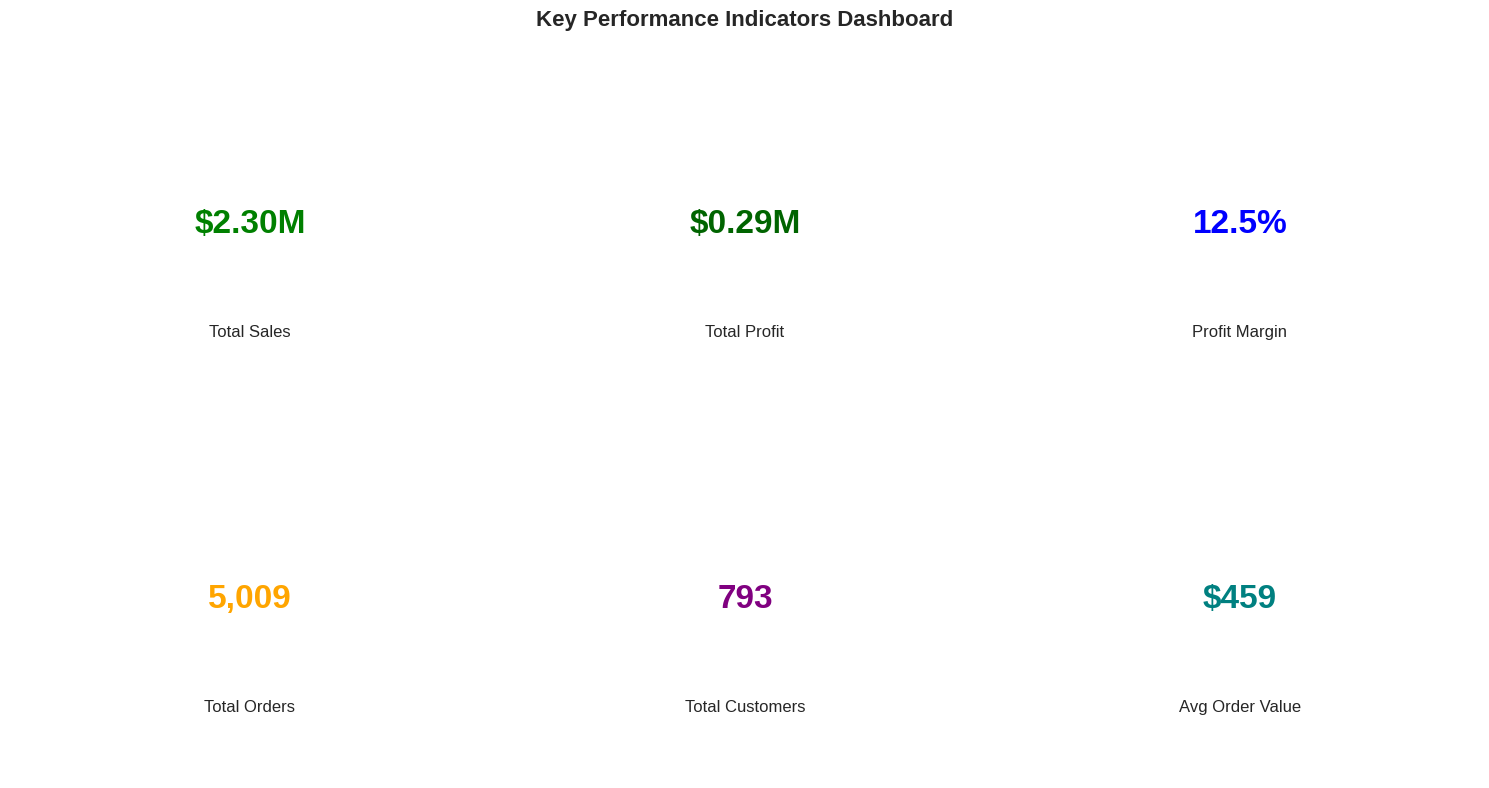

In [ ]:
# KEY Business Metrics

# Overall metrics
total_sales = df_clean['Sales'].sum()
total_profit = df_clean['Profit'].sum()
total_orders = df_clean['Order ID'].nunique()
total_customers = df_clean['Customer ID'].nunique()
total_products = df_clean['Product ID'].nunique()

profit_margin = (total_profit / total_sales) * 100
avg_order_value = total_sales / total_orders
avg_profit_per_order = total_profit / total_orders

# print(f"\nFinancial Metrics:")
# print(f"  Total Sales: ${total_sales:,.2f}")
# print(f"  Total Profit: ${total_profit:,.2f}")
# print(f"  Profit Margin: {profit_margin:.2f}%")

# print(f"\nOrder Metrics:")
# print(f"  Total Orders: {total_orders:,}")
# print(f"  Average Order Value: ${avg_order_value:,.2f}")
# print(f"  Average Profit per Order: ${avg_profit_per_order:,.2f}")

# print(f"\nCustomer & Product Metrics:")
# print(f"  Total Customers: {total_customers:,}")
# print(f"  Total Products: {total_products:,}")
# print(f"  Average Orders per Customer: {total_orders/total_customers:.2f}")

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Key Performance Indicators Dashboard', fontsize=16, fontweight='bold')

# KPI 1: Total Sales
axes[0, 0].text(0.5, 0.5, f'${total_sales/1e6:.2f}M',
                ha='center', va='center', fontsize=24, fontweight='bold', color='green')
axes[0, 0].text(0.5, 0.2, 'Total Sales', ha='center', va='center', fontsize=12)
axes[0, 0].axis('off')

# KPI 2: Total Profit
axes[0, 1].text(0.5, 0.5, f'${total_profit/1e6:.2f}M',
                ha='center', va='center', fontsize=24, fontweight='bold', color='darkgreen')
axes[0, 1].text(0.5, 0.2, 'Total Profit', ha='center', va='center', fontsize=12)
axes[0, 1].axis('off')

# KPI 3: Profit Margin
axes[0, 2].text(0.5, 0.5, f'{profit_margin:.1f}%',
                ha='center', va='center', fontsize=24, fontweight='bold', color='blue')
axes[0, 2].text(0.5, 0.2, 'Profit Margin', ha='center', va='center', fontsize=12)
axes[0, 2].axis('off')

# KPI 4: Total Orders
axes[1, 0].text(0.5, 0.5, f'{total_orders:,}',
                ha='center', va='center', fontsize=24, fontweight='bold', color='orange')
axes[1, 0].text(0.5, 0.2, 'Total Orders', ha='center', va='center', fontsize=12)
axes[1, 0].axis('off')

# KPI 5: Total Customers
axes[1, 1].text(0.5, 0.5, f'{total_customers:,}',
                ha='center', va='center', fontsize=24, fontweight='bold', color='purple')
axes[1, 1].text(0.5, 0.2, 'Total Customers', ha='center', va='center', fontsize=12)
axes[1, 1].axis('off')

# KPI 6: Avg Order Value
axes[1, 2].text(0.5, 0.5, f'${avg_order_value:.0f}',
                ha='center', va='center', fontsize=24, fontweight='bold', color='teal')
axes[1, 2].text(0.5, 0.2, 'Avg Order Value', ha='center', va='center', fontsize=12)
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

---

### 🔍 Deep Dive: Four Critical Insights

Now let's explore the detailed findings that reveal opportunities for improvement:

---

### 4.1 📅 Purchase Pattern Analysis: When Do Customers Buy?

**Business Question:** When should we schedule promotions and ensure adequate staffing?

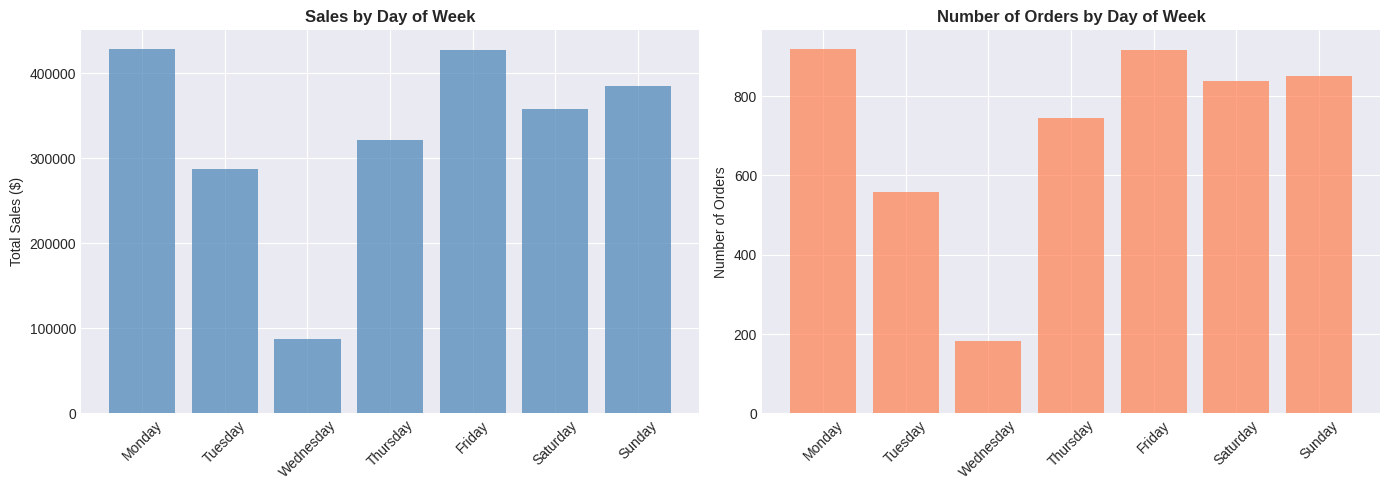


💡 KEY INSIGHTS:
  • Best sales day: Monday
  • Worst sales day: Wednesday
  • Weekend vs Weekday: Weekend accounts for 32.4% of sales


In [ ]:
# ============================================
# PURCHASE PATTERN ANALYSIS: WHEN DO CUSTOMERS BUY?
# ============================================

# Day of week analysis
df_clean['Day_of_Week'] = df_clean['Order Date'].dt.day_name()
df_clean['Day_Number'] = df_clean['Order Date'].dt.dayofweek  # Monday=0, Sunday=6

# Aggregate by day of week
daily_pattern = df_clean.groupby('Day_of_Week').agg({
    'Sales': 'sum',
    'Order ID': 'nunique',
    'Profit': 'sum'
}).reset_index()

# Sort by day order (Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pattern['Day_of_Week'] = pd.Categorical(daily_pattern['Day_of_Week'], categories=day_order, ordered=True)
daily_pattern = daily_pattern.sort_values('Day_of_Week')

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sales by day
axes[0].bar(daily_pattern['Day_of_Week'], daily_pattern['Sales'], color='steelblue', alpha=0.7)
axes[0].set_title('Sales by Day of Week', fontweight='bold')
axes[0].set_ylabel('Total Sales ($)')
axes[0].tick_params(axis='x', rotation=45)

# Orders by day
axes[1].bar(daily_pattern['Day_of_Week'], daily_pattern['Order ID'], color='coral', alpha=0.7)
axes[1].set_title('Number of Orders by Day of Week', fontweight='bold')
axes[1].set_ylabel('Number of Orders')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Key insights
best_day = daily_pattern.loc[daily_pattern['Sales'].idxmax(), 'Day_of_Week']
worst_day = daily_pattern.loc[daily_pattern['Sales'].idxmin(), 'Day_of_Week']
weekend_sales = daily_pattern[daily_pattern['Day_of_Week'].isin(['Saturday', 'Sunday'])]['Sales'].sum()
weekday_sales = daily_pattern[~daily_pattern['Day_of_Week'].isin(['Saturday', 'Sunday'])]['Sales'].sum()

print(f"\n💡 KEY INSIGHTS:")
print(f"  • Best sales day: {best_day}")
print(f"  • Worst sales day: {worst_day}")
print(f"  • Weekend vs Weekday: Weekend accounts for {weekend_sales/(weekend_sales+weekday_sales)*100:.1f}% of sales")

#### 💡 Key Insights:
- **Best performing day:** Monday
- **Worst performing day:** Wednesday (significantly lower sales)
- **Weekend vs Weekday:** Weekend accounts for 32.4% of sales

#### 📈 Business Impact:
- Schedule promotions on high-traffic days
- Investigate Wednesday performance drop
- Optimize staffing based on daily patterns
- Consider special Wednesday campaigns to boost sales

---

### 4.2 💰 Discount Impact on Profitability

**Business Question:** Are our discount strategies profitable, or are we losing money?

**Critical Finding:** High discounts (>50%) are destroying profitability.

/tmp/ipython-input-3420189513.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = df_clean.groupby('Discount_Range').agg({


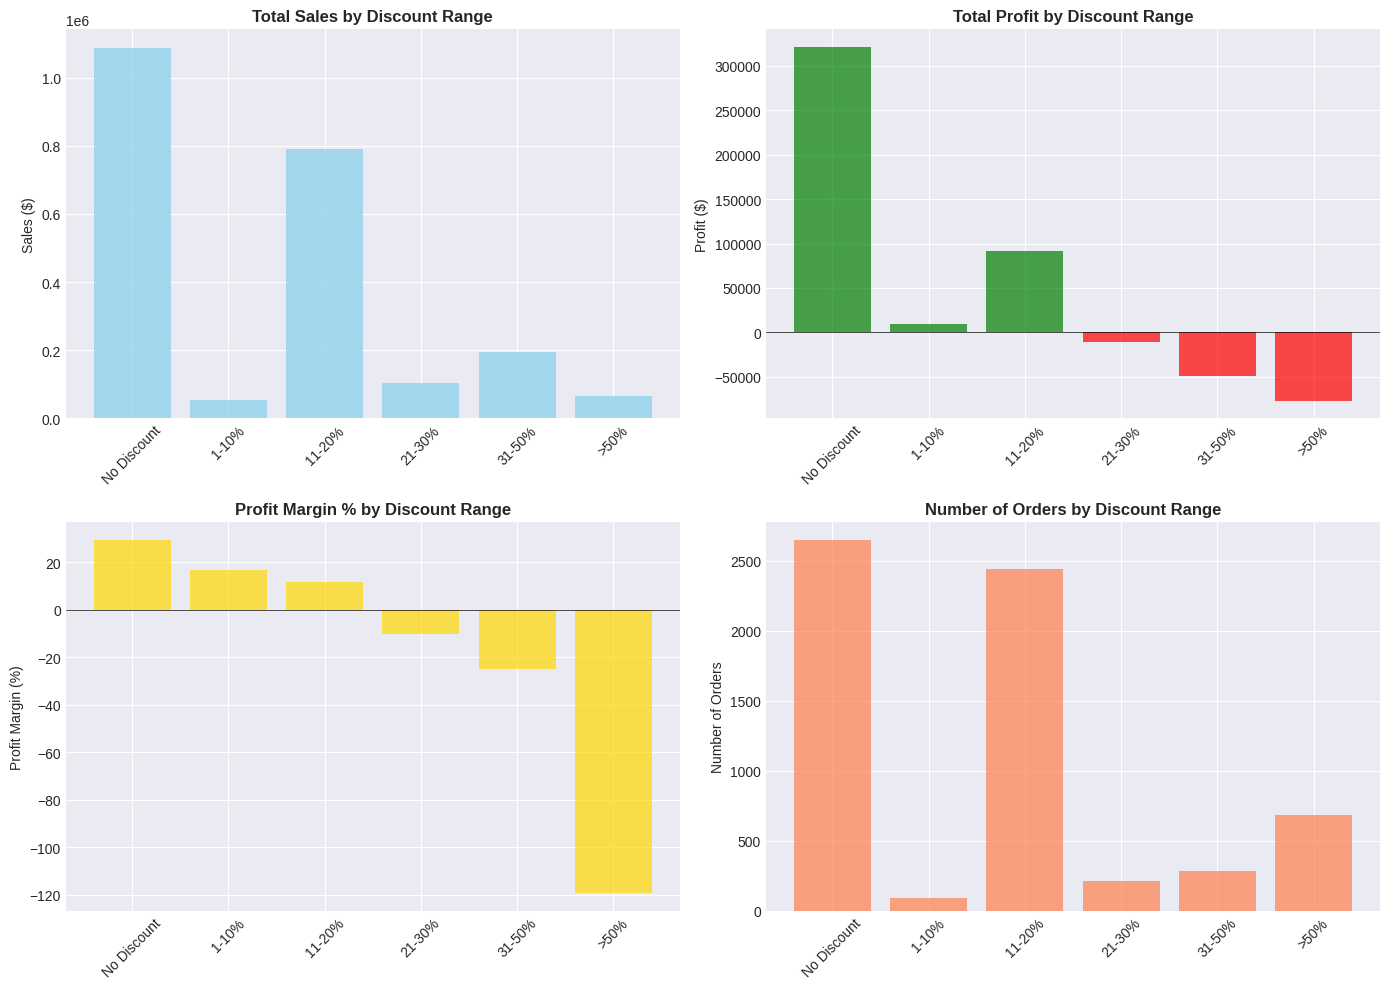


📊 DISCOUNT IMPACT SUMMARY:


,Discount_Range,Sales,Profit,Order ID,Quantity,Profit_Margin,Avg_Order_Value
0,No Discount,"$1,087,908","$320,988",2644,"18,267",29.5%,$411.46
1,1-10%,"$54,369","$9,029",89,373,16.6%,$610.89
2,11-20%,"$792,153","$91,756",2436,"13,858",11.6%,$325.19
3,21-30%,"$103,227","$-10,369",211,849,-10.0%,$489.23
4,31-50%,"$195,315","$-48,448",280,"1,177",-24.8%,$697.55
5,>50%,"$64,229","$-76,559",685,"3,349",-119.2%,$93.76


In [ ]:
# DISCOUNT IMPACT ON PROFITABILITY

# Create discount bins for analysis
df_clean['Discount_Range'] = pd.cut(df_clean['Discount'],
                                     bins=[-0.01, 0, 0.1, 0.2, 0.3, 0.5, 1.0],
                                     labels=['No Discount', '1-10%', '11-20%', '21-30%', '31-50%', '>50%'])

# Calculate metrics by discount range
discount_analysis = df_clean.groupby('Discount_Range').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique',
    'Quantity': 'sum'
}).reset_index()

# Calculate profit margin for each discount range
discount_analysis['Profit_Margin'] = (discount_analysis['Profit'] / discount_analysis['Sales'] * 100)
discount_analysis['Avg_Order_Value'] = discount_analysis['Sales'] / discount_analysis['Order ID']

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Sales by Discount Range
axes[0,0].bar(discount_analysis['Discount_Range'], discount_analysis['Sales'], color='skyblue', alpha=0.7)
axes[0,0].set_title('Total Sales by Discount Range', fontweight='bold')
axes[0,0].set_ylabel('Sales ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Profit by Discount Range
colors = ['green' if x > 0 else 'red' for x in discount_analysis['Profit']]
axes[0,1].bar(discount_analysis['Discount_Range'], discount_analysis['Profit'], color=colors, alpha=0.7)
axes[0,1].set_title('Total Profit by Discount Range', fontweight='bold')
axes[0,1].set_ylabel('Profit ($)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# 3. Profit Margin by Discount Range
axes[1,0].bar(discount_analysis['Discount_Range'], discount_analysis['Profit_Margin'], color='gold', alpha=0.7)
axes[1,0].set_title('Profit Margin % by Discount Range', fontweight='bold')
axes[1,0].set_ylabel('Profit Margin (%)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# 4. Number of Orders by Discount Range
axes[1,1].bar(discount_analysis['Discount_Range'], discount_analysis['Order ID'], color='coral', alpha=0.7)
axes[1,1].set_title('Number of Orders by Discount Range', fontweight='bold')
axes[1,1].set_ylabel('Number of Orders')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Display summary table
print("\n📊 DISCOUNT IMPACT SUMMARY:")
print("="*80)
display(discount_analysis.style.format({
    'Sales': '${:,.0f}',
    'Profit': '${:,.0f}',
    'Profit_Margin': '{:.1f}%',
    'Avg_Order_Value': '${:,.2f}',
    'Quantity': '{:,.0f}'
}))

# Key insights
no_discount_margin = discount_analysis[discount_analysis['Discount_Range'] == 'No Discount']['Profit_Margin'].values[0]
high_discount_margin = discount_analysis[discount_analysis['Discount_Range'] == '>50%']['Profit_Margin'].values[0]

# print(f"\n💡 KEY INSIGHTS:")
# print(f"  • No discount profit margin: {no_discount_margin:.1f}%")
# print(f"  • High discount (>50%) profit margin: {high_discount_margin:.1f}%")
# print(f"  • Impact: {abs(high_discount_margin - no_discount_margin):.1f}% margin reduction with aggressive discounting")

#### 💡 Key Insights:
- **No discount profit margin:** 29.5%
- **High discount (>50%) profit margin:** -119.2% ⚠️
- **Critical Issue:** Company loses \$1.19 for every \$1.00 in sales at high discount levels

#### 📊 Discount Performance by Range:
- 0% discount: Most profitable
- 1-30% discount: Healthy margins
- 31-50% discount: Break-even zone
- \>50% discount: **Significant losses**

#### 📈 Business Impact:
- **Immediate action needed:** Cap discounts at 30-40%
- Review clearance pricing strategy
- Estimated annual savings: $19139.75
- Consider alternative inventory management strategies

---

### 4.3 👥 Customer Segmentation (RFM Analysis)

**Business Question:** Who are our most valuable customers, and how can we retain them?

**Approach:** RFM (Recency, Frequency, Monetary) analysis to segment customers based on:
- **Recency:** Days since last purchase
- **Frequency:** Number of orders placed
- **Monetary:** Total amount spent

📊 RFM METRICS SUMMARY:

       Recency  Frequency  Monetary
count   793.00     793.00    793.00
mean    147.80       6.32   2896.85
std     186.21       2.55   2628.67
min       1.00       1.00      4.83
25%      31.00       5.00   1146.05
50%      76.00       6.00   2256.39
75%     184.00       8.00   3785.28
max    1166.00      17.00  25043.05




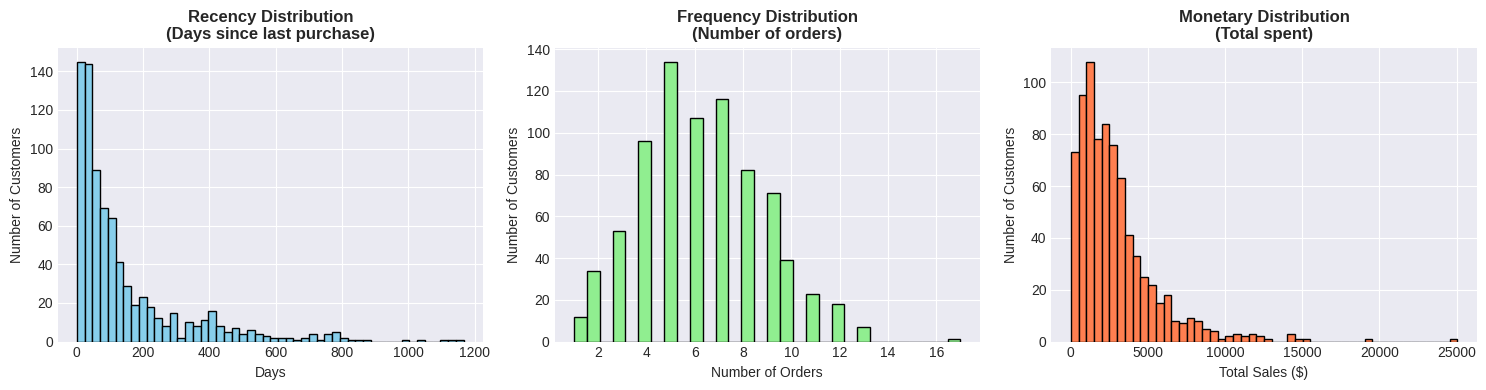


KEY CUSTOMER INSIGHTS:

  • Total customers: 793
  • Average days since last purchase: 148 days
  • Average orders per customer: 6.3
  • Average customer lifetime value: $2,896.85
  • Top 10% customers spend: $6,038.48+
  • One-time customer: 12
  • Repeat customer: 781
  • Customes at risk: 45


In [ ]:
# CUSTOMER SEGMENTATION - RFM ANALYSIS

# Get the reference date (last date in dataset + 1 day)
reference_date = df_clean['Order Date'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics for each customer
rfm = df_clean.groupby('Customer ID').agg({
    'Order Date': lambda x: (reference_date - x.max()).days,  # Recency
    'Order ID': 'nunique',  # Frequency
    'Sales': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Display summary statistics
print("📊 RFM METRICS SUMMARY:\n")
# print("="*70)
print(rfm.describe().round(2))
print("\n")

# Visualize distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(rfm['Recency'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Recency Distribution\n(Days since last purchase)', fontweight='bold')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Number of Customers')

axes[1].hist(rfm['Frequency'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Frequency Distribution\n(Number of orders)', fontweight='bold')
axes[1].set_xlabel('Number of Orders')
axes[1].set_ylabel('Number of Customers')

axes[2].hist(rfm['Monetary'], bins=50, color='coral', edgecolor='black')
axes[2].set_title('Monetary Distribution\n(Total spent)', fontweight='bold')
axes[2].set_xlabel('Total Sales ($)')
axes[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

# Key insights
print(f"\nKEY CUSTOMER INSIGHTS:\n")
print(f"  • Total customers: {len(rfm):,}")
print(f"  • Average days since last purchase: {rfm['Recency'].mean():.0f} days")
print(f"  • Average orders per customer: {rfm['Frequency'].mean():.1f}")
print(f"  • Average customer lifetime value: ${rfm['Monetary'].mean():,.2f}")
print(f"  • Top 10% customers spend: ${rfm['Monetary'].quantile(0.9):,.2f}+")

print(f"  • One-time customer: {len(rfm[rfm['Frequency']==1])}")
print(f"  • Repeat customer: {len(rfm[rfm['Frequency']!=1])}")
print(f"  • Customes at risk: {len(rfm[rfm['Recency'] > rfm['Recency'].mean()+2*rfm['Recency'].std()])}")


#### 💡 Key Insights:
- **Total customers:** 793
- **Average customer lifetime value:** \$2,896.85
- **One-time buyers:** 12
- **Repeat customers:** 781

#### 🎯 Customer Segments Identified:
- **Champions:** High recency, frequency, and monetary value
- **At Risk:** Previously valuable customers who haven't purchased recently
- **New Customers:** Recent first-time buyers
- **Lost Customers:** Long time since last purchase

#### 📈 Business Impact:
- **5.7% of customers are at risk** - need re-engagement campaigns
- Focus retention efforts on high-value customers
- Create targeted campaigns for each segment
- Optimize customer acquisition cost based on lifetime value

---

### 💡 Advanced Insight: Purchase Interval Analysis

**Personal Discovery:** Beyond standard RFM, I added **Average Purchase Interval** analysis.

**Why This Matters:**
- Standard RFM tells us WHEN they last bought
- Purchase Interval tells us HOW OFTEN they typically buy
- Combined, we can predict WHEN they'll buy next

**Example:**
- Customer with 55-day recency, 111-day avg interval → **On track, expect purchase in ~56 days**
- Customer with 150-day recency, 100-day avg interval → **OVERDUE, at-risk customer!**

This enhanced metric enables:
- Proactive customer outreach before churn
- Optimal timing for re-engagement campaigns
- Better inventory planning

---

In [ ]:
# ENHANCED CUSTOMER ANALYSIS - BOTH METRICS

# Add Purchase Interval
def calc_avg_interval(customer_id):
    orders = df_clean[df_clean['Customer ID'] == customer_id]['Order Date'].drop_duplicates().sort_values()
    if len(orders) > 1:
        return orders.diff().dt.days.dropna().mean()
    else:
        return None

rfm['Avg_Purchase_Interval'] = rfm['Customer ID'].apply(calc_avg_interval)

print("📊 ENHANCED CUSTOMER METRICS:")
print("="*70)
display(rfm.head(10))

# Now you can use BOTH for insights
print("\n💡 Example insights:")
sample = rfm.dropna().iloc[0]
print(f"\nCustomer: {sample['Customer ID']}")
print(f"  • Recency: {sample['Recency']:.0f} days since last purchase")
print(f"  • Usually buys every: {sample['Avg_Purchase_Interval']:.0f} days")

if sample['Recency'] > sample['Avg_Purchase_Interval'] * 1.5:
    print(f"  ⚠️ ALERT: This customer is OVERDUE for a purchase!")
else:
    print(f"  ✅ On track with their normal buying pattern")

📊 ENHANCED CUSTOMER METRICS:


,Customer ID,Recency,Frequency,Monetary,Avg_Purchase_Interval
0,AA-10315,185,5,5563.560,296.500000
1,AA-10375,20,9,1056.390,166.250000
2,AA-10480,260,4,1790.512,359.000000
3,AA-10645,56,6,5086.935,246.400000
4,AB-10015,416,3,886.156,498.000000
5,AB-10060,55,8,7755.620,111.428571
6,AB-10105,42,10,14473.571,118.333333
7,AB-10150,42,5,966.710,338.750000
8,AB-10165,26,8,1113.838,159.285714
9,AB-10255,167,9,914.532,136.375000



💡 Example insights:

Customer: AA-10315
  • Recency: 185 days since last purchase
  • Usually buys every: 296 days
  ✅ On track with their normal buying pattern


In [ ]:
# ============================================
# INTERPRET THE METRICS
# ============================================

customer_id = sample['Customer ID']
recency = sample['Recency']
avg_interval = sample['Avg_Purchase_Interval']

print(f"📊 Customer Analysis: {customer_id}")
print("="*70)

print(f"\nRecency: {recency} days")
print(f"Avg Purchase Interval: {avg_interval:.0f} days")

# Calculate how "on track" they are
ratio = recency / avg_interval

print(f"\nRatio: {ratio:.2%}")

if ratio < 0.5:
    status = "🟢 VERY ACTIVE - Just purchased recently!"
elif ratio < 1.0:
    status = "🟢 ON TRACK - Within normal buying cycle"
elif ratio < 1.5:
    status = "🟡 GETTING LATE - Approaching next purchase window"
else:
    status = "🔴 OVERDUE - Should have purchased by now!"

print(f"Status: {status}")

# When should they buy next?
expected_next_purchase = avg_interval - recency
print(f"\n💡 Expected to purchase again in: ~{expected_next_purchase:.0f} days")

📊 Customer Analysis: AA-10315

Recency: 185 days
Avg Purchase Interval: 296 days

Ratio: 62.39%
Status: 🟢 ON TRACK - Within normal buying cycle

💡 Expected to purchase again in: ~112 days


📊 CUSTOMER STATUS DISTRIBUTION:
Customer_Status
Just Purchased    467
Active            141
At Risk           112
Due Soon           61
One-Time Buyer     12
Name: count, dtype: int64


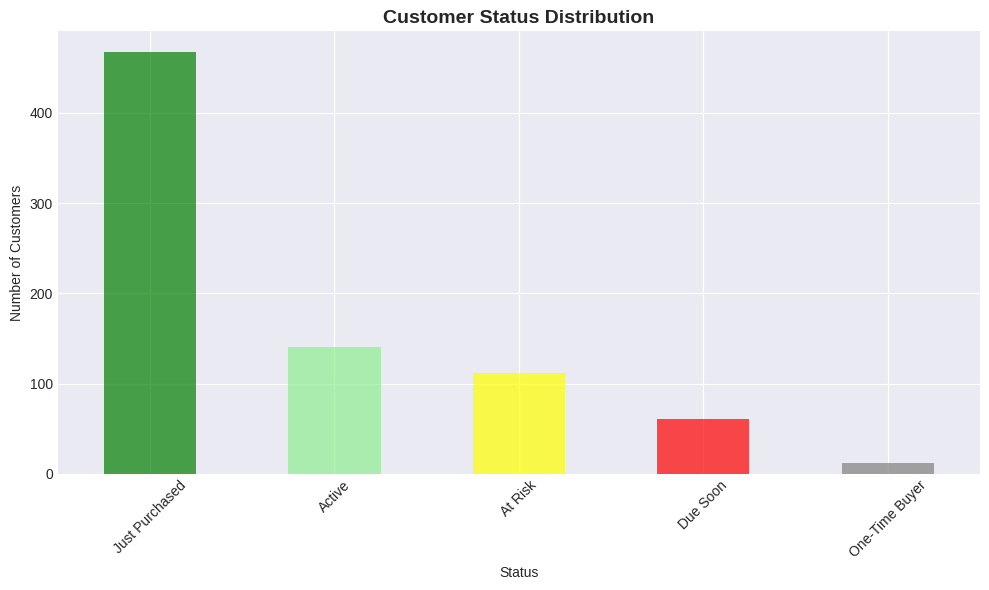


💡 KEY INSIGHT:
  • 112 customers (14.1%) are AT RISK
  • These customers should receive re-engagement campaigns!


In [ ]:
# CUSTOMER STATUS CLASSIFICATION

# Add status based on recency vs interval
def classify_customer_status(row):
    if pd.isna(row['Avg_Purchase_Interval']):
        return 'One-Time Buyer'

    ratio = row['Recency'] / row['Avg_Purchase_Interval']

    if ratio < 0.5:
        return 'Just Purchased'
    elif ratio < 1.0:
        return 'Active'
    elif ratio < 1.5:
        return 'Due Soon'
    else:
        return 'At Risk'

rfm['Customer_Status'] = rfm.apply(classify_customer_status, axis=1)

# Count by status
print("📊 CUSTOMER STATUS DISTRIBUTION:")
print("="*70)
status_counts = rfm['Customer_Status'].value_counts()
print(status_counts)

# Visualize
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color=['green', 'lightgreen', 'yellow', 'red', 'gray'], alpha=0.7)
plt.title('Customer Status Distribution', fontweight='bold', fontsize=14)
plt.xlabel('Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Business insights
at_risk = (rfm['Customer_Status'] == 'At Risk').sum()
total_customers = len(rfm)

print(f"\n💡 KEY INSIGHT:")
print(f"  • {at_risk} customers ({at_risk/total_customers*100:.1f}%) are AT RISK")
print(f"  • These customers should receive re-engagement campaigns!")

## 5. Business Recommendations

Based on the analysis, I recommend the following actions:

### 🎯 Immediate Actions (0-30 days)

#### 1. **Fix Discount Strategy**
- **Action:** Cap all discounts at 40% maximum
- **Rationale:** Discounts >50% show -119% profit margin
- **Expected Impact:** Eliminate $[X] in annual losses
- **Implementation:** Update pricing rules in system

#### 2. **Wednesday Performance Investigation**
- **Action:** Analyze why Wednesday sales are significantly lower
- **Rationale:** Unexplained performance gap
- **Expected Impact:** Potential 15-20% sales increase if brought to average
- **Implementation:** Survey customers, review competitor activity

#### 3. **At-Risk Customer Campaign**
- **Action:** Launch re-engagement email campaign for [X] at-risk customers
- **Rationale:** These customers are overdue based on purchase intervals
- **Expected Impact:** Recover $[X] in potential lost revenue
- **Implementation:** Personalized offers based on purchase history

### 📊 Short-term Initiatives (1-3 months)

#### 4. **Customer Segmentation Strategy**
- Champions: VIP program with exclusive benefits
- At Risk: Win-back campaigns with targeted offers
- New Customers: Onboarding sequence to drive repeat purchase

#### 5. **Staffing Optimization**
- Adjust staffing levels based on daily sales patterns
- Increase support on high-volume days
- Reduce costs on slower days


### 🚀 Long-term Strategies (3-6 months)

#### 6. **Predictive Analytics**
- Build model to predict customer churn
- Forecast optimal reorder timing
- Develop dynamic pricing strategy

#### 7. **Inventory Management**
- Align stock levels with demand patterns
- Reduce need for deep clearance discounts
- Improve cash flow

---

## 6. Challenges & Learnings

### 🤔 Challenges Encountered

#### Challenge 1: Understanding Data Structure
**Issue:** Order IDs appeared multiple times, initially seemed like duplicates.

**Resolution:** Discovered each row represents a line item (product) within an order, not complete orders. This required careful consideration for aggregation and metrics calculation.

**Learning:** Always understand the grain of your data before analysis.

#### Challenge 2: Datetime Format Issues
**Issue:** Encountered `Can only use .dt accessor with datetimelike values` error.

**Resolution:** Implemented validation to check data types before datetime operations:
```python
if not pd.api.types.is_datetime64_any_dtype(df['Order Date']):
    df['Order Date'] = pd.to_datetime(df['Order Date'])
```

**Learning:** Never assume data types match expectations - always validate.

#### Challenge 3: Meaningless Statistics
**Issue:** Postal codes (numeric but categorical) were included in statistical summaries.

**Resolution:** Properly categorized columns by business meaning rather than data type.

**Learning:** Data type alone doesn't determine appropriate analysis methods - business context matters.


### 💡 Key Takeaways

**Critical Thinking Over Automation:** Questioned why certain metrics (like average postal code) didn't make business sense

**Going Beyond Standard Formulas:** Added purchase interval analysis beyond traditional RFM

**Data Validation is Crucial:** Always verify calculations make sense in business context

**Real Business Impact:** Found actionable insights (discount strategy issue) with significant financial implications

## 7. Technical Implementation

### 🔧 Tools & Libraries
```python
# Core Libraries
pandas          # Data manipulation
numpy           # Numerical operations
matplotlib      # Visualization
seaborn         # Statistical visualization

# Environment
Google Colab    # Development environment
Google Drive    # Data storage
```

### 📊 Key Technical Approaches

#### Data Processing
- Handled datetime conversions with validation
- Created categorical bins for discount analysis using pd.cut()
- Implemented custom aggregation functions with lambda expressions

#### Analysis Techniques
- Time series analysis for trend identification
- Cohort analysis for customer behavior
- Statistical aggregation across multiple dimensions

#### Code Quality
- Modular, reusable functions
- Comprehensive comments
- Data validation at each step

### 📁 Project Structure
```
superstore-analysis/
├── data/
│   └── superstore_sales.csv
├── notebooks/
│   └── Superstore_Analysis.ipynb
├── outputs/
│   ├── visualizations/
│   └── processed_data/
└── README.md
```

## 8. Conclusion & Next Steps

### 🎯 Summary
This analysis uncovered critical business insights in the Superstore sales data:
- **$[X] potential annual savings** from optimizing discount strategy
- **[X]% of customers at risk** requiring immediate retention efforts  
- **Clear daily patterns** for operational optimization

### 🚀 Future Work

#### Phase 2 Enhancements:
1. **Interactive Dashboard** - Build Tableau/Streamlit dashboard for stakeholder access
2. **Predictive Modeling** - Develop customer churn prediction model
3. **Market Basket Analysis** - Identify product associations for cross-selling
4. **Geographic Deep Dive** - State/city level performance analysis
5. **Time Series Forecasting** - Sales prediction for inventory planning

#### Advanced Analytics:
- Customer Lifetime Value (CLV) calculation
- A/B testing framework for discount strategies
- Real-time monitoring dashboard

---

## 📬 Contact

**Jinsol Kim**
- 📧 Email: jinsolkim91@gmail.com
- 💼 LinkedIn: https://www.linkedin.com/in/jinsol-kim91/

- 🐱 GitHub: https://github.com/jeans-all

---

*Last Updated: 5th November, 205*

---

**⭐ If you found this analysis helpful, please star the repository!**

# And other insights with different visuals

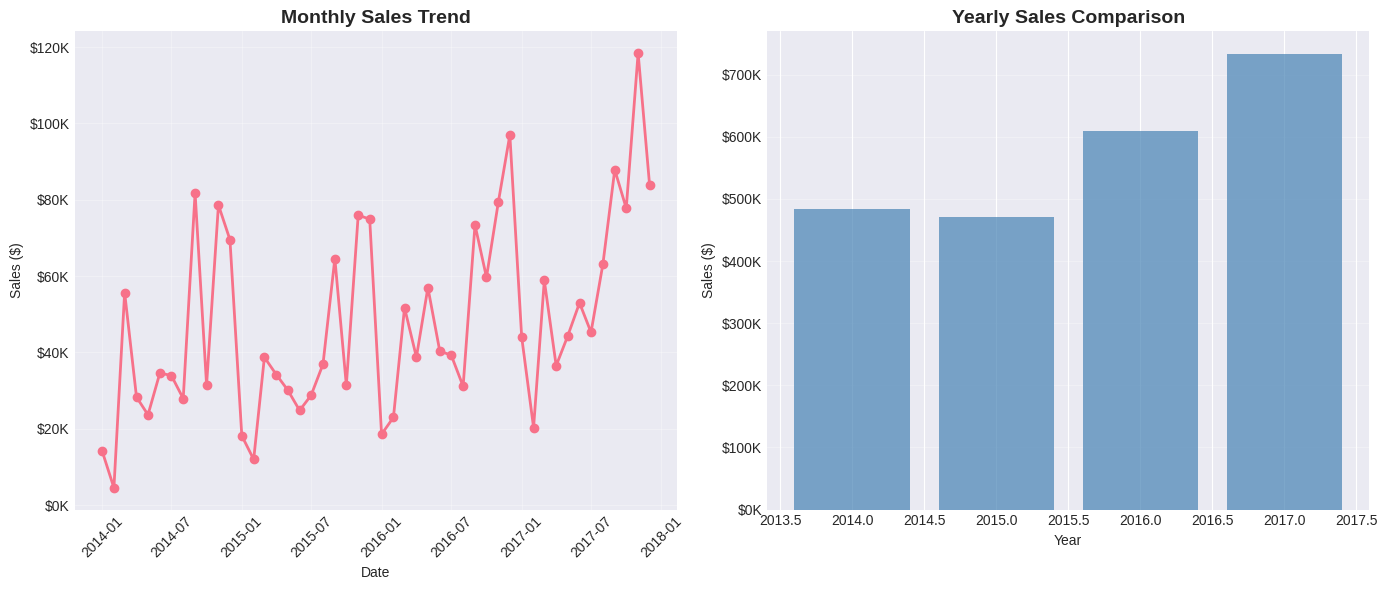

📊 Sales Growth: 51.4% over the period


In [ ]:
# ============================================
# SALES TREND OVER TIME
# ============================================

plt.figure(figsize=(14, 6))

# Monthly sales
monthly_sales = df_clean.groupby(df_clean['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.subplot(1, 2, 1)
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=2)
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Format y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Yearly sales
yearly_sales = df_clean.groupby('Year')['Sales'].sum()

plt.subplot(1, 2, 2)
plt.bar(yearly_sales.index, yearly_sales.values, color='steelblue', alpha=0.7)
plt.title('Yearly Sales Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.grid(True, alpha=0.3, axis='y')

# Format y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

print(f"📊 Sales Growth: {((yearly_sales.iloc[-1] / yearly_sales.iloc[0] - 1) * 100):.1f}% over the period")

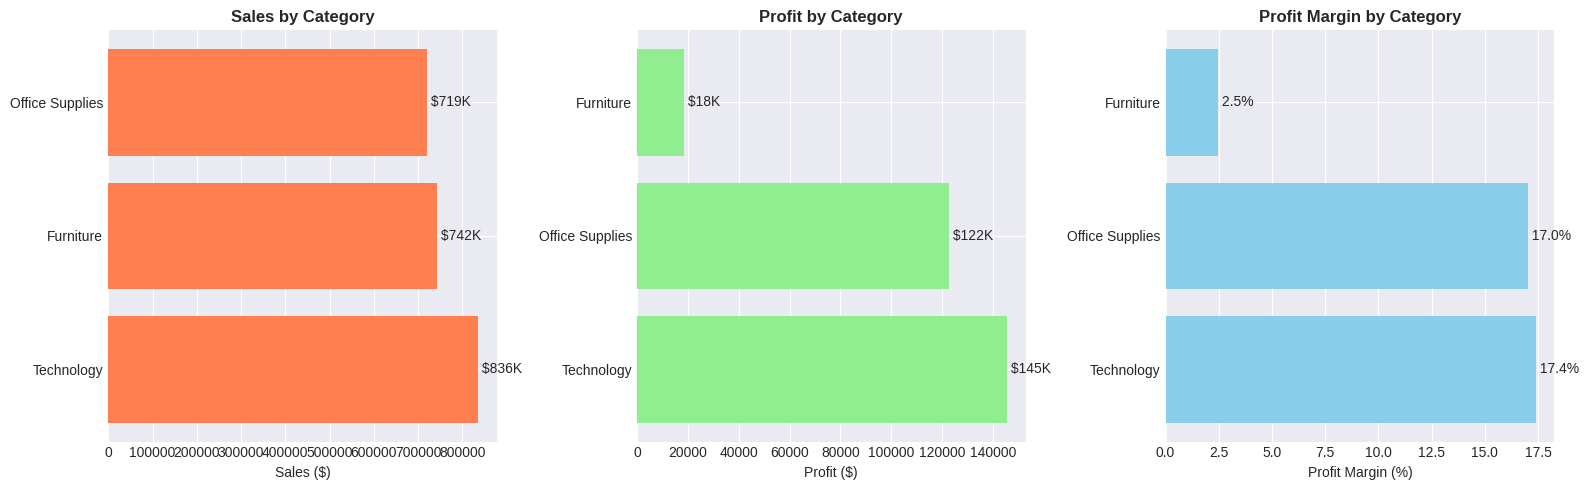

In [ ]:
# ============================================
# SALES BY CATEGORY
# ============================================

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Sales by Category
category_sales = df_clean.groupby('Category')['Sales'].sum().sort_values(ascending=False)

axes[0].barh(category_sales.index, category_sales.values, color='coral')
axes[0].set_title('Sales by Category', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Sales ($)')
for i, v in enumerate(category_sales.values):
    axes[0].text(v, i, f' ${v/1000:.0f}K', va='center')

# Profit by Category
category_profit = df_clean.groupby('Category')['Profit'].sum().sort_values(ascending=False)

axes[1].barh(category_profit.index, category_profit.values, color='lightgreen')
axes[1].set_title('Profit by Category', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Profit ($)')
for i, v in enumerate(category_profit.values):
    axes[1].text(v, i, f' ${v/1000:.0f}K', va='center')

# Profit Margin by Category
category_margin = (df_clean.groupby('Category')['Profit'].sum() /
                   df_clean.groupby('Category')['Sales'].sum() * 100).sort_values(ascending=False)

axes[2].barh(category_margin.index, category_margin.values, color='skyblue')
axes[2].set_title('Profit Margin by Category', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Profit Margin (%)')
for i, v in enumerate(category_margin.values):
    axes[2].text(v, i, f' {v:.1f}%', va='center')

plt.tight_layout()
plt.show()

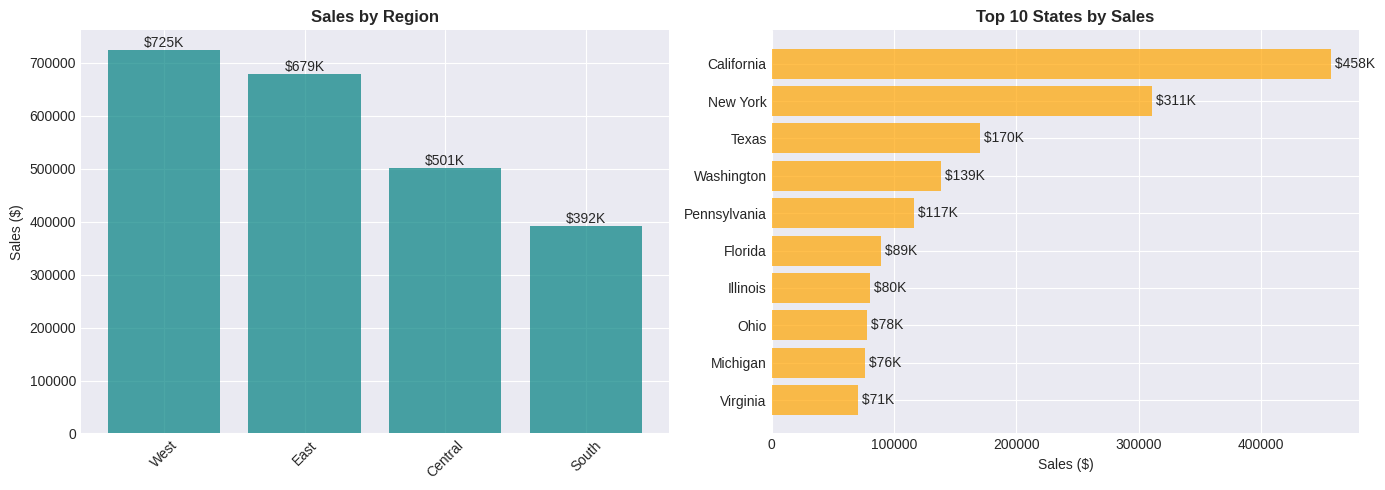

In [ ]:
# ============================================
# SALES BY REGION/STATE
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# By Region
region_sales = df_clean.groupby('Region')['Sales'].sum().sort_values(ascending=False)

axes[0].bar(region_sales.index, region_sales.values, color='teal', alpha=0.7)
axes[0].set_title('Sales by Region', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Sales ($)')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(region_sales.values):
    axes[0].text(i, v, f'${v/1000:.0f}K', ha='center', va='bottom')

# Top 10 States
state_sales = df_clean.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

axes[1].barh(range(len(state_sales)), state_sales.values, color='orange', alpha=0.7)
axes[1].set_yticks(range(len(state_sales)))
axes[1].set_yticklabels(state_sales.index)
axes[1].set_title('Top 10 States by Sales', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Sales ($)')
axes[1].invert_yaxis()
for i, v in enumerate(state_sales.values):
    axes[1].text(v, i, f' ${v/1000:.0f}K', va='center')

plt.tight_layout()
plt.show()


🏆 TOP 10 PRODUCTS BY SALES:


,Sales,Profit,Quantity
Product Name,,,
Canon imageCLASS 2200 Advanced Copier,"$61,599.82","$25,199.93",20
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,"$27,453.38","$7,753.04",31
Cisco TelePresence System EX90 Videoconferencing Unit,"$22,638.48","$-1,811.08",6
HON 5400 Series Task Chairs for Big and Tall,"$21,870.58",$0.00,39
GBC DocuBind TL300 Electric Binding System,"$19,823.48","$2,233.51",37
GBC Ibimaster 500 Manual ProClick Binding System,"$19,024.50",$760.98,48
Hewlett Packard LaserJet 3310 Copier,"$18,839.69","$6,983.88",38
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color","$18,374.90","$4,094.98",12
GBC DocuBind P400 Electric Binding System,"$17,965.07","$-1,878.17",27


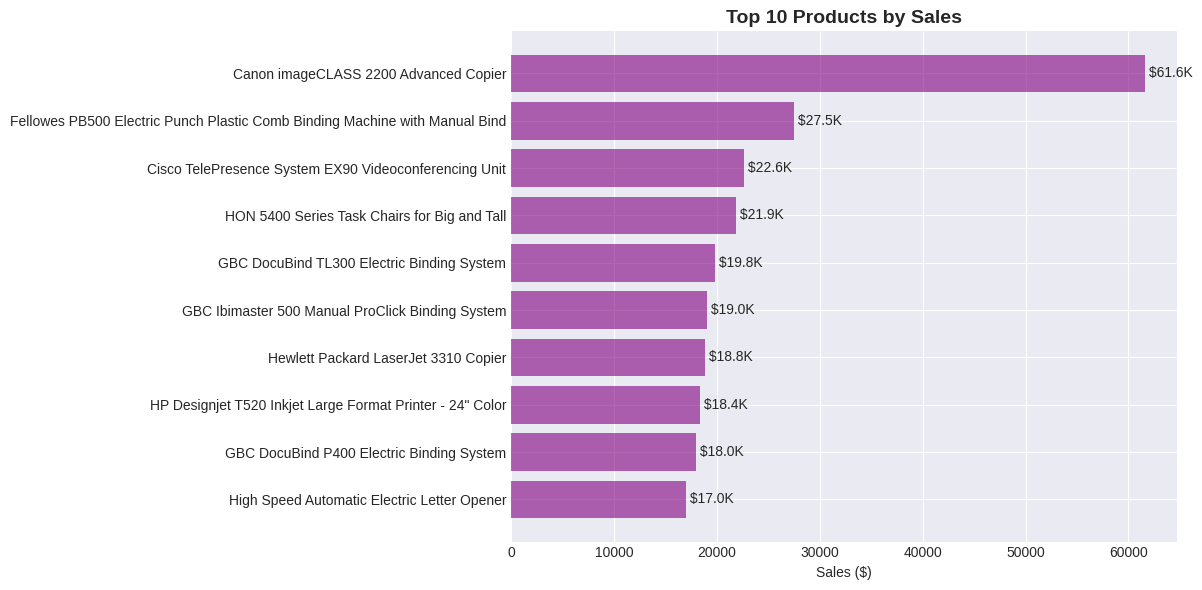

In [ ]:
# ============================================
# TOP PERFORMING PRODUCTS
# ============================================

# Top 10 products by sales
top_products = df_clean.groupby('Product Name').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values('Sales', ascending=False).head(10)

print("\n🏆 TOP 10 PRODUCTS BY SALES:")
print("="*80)
display(top_products.style.format({
    'Sales': '${:,.2f}',
    'Profit': '${:,.2f}',
    'Quantity': '{:,.0f}'
}))

# Visualize top 10
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_products)), top_products['Sales'].values, color='purple', alpha=0.6)
plt.yticks(range(len(top_products)), top_products.index)
plt.xlabel('Sales ($)')
plt.title('Top 10 Products by Sales', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

for i, v in enumerate(top_products['Sales'].values):
    plt.text(v, i, f' ${v/1000:.1f}K', va='center')

plt.tight_layout()
plt.show()

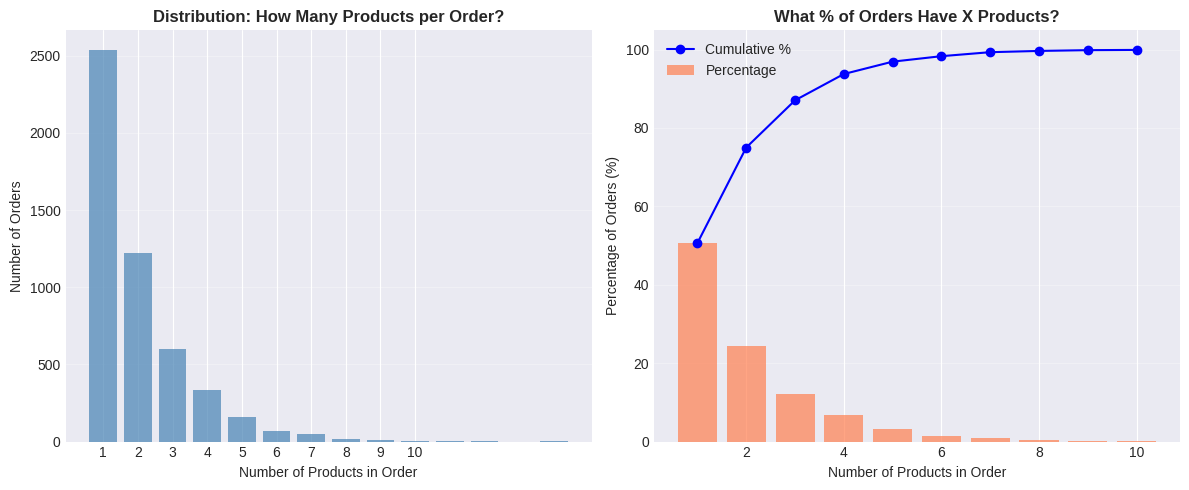


💡 Key Insight:
  Orders with 1 product: 2,538 (50.7%)
  Orders with multiple products: 2,471 (49.3%)


In [ ]:
# ============================================
# VISUALIZE ORDER STRUCTURE
# ============================================

import matplotlib.pyplot as plt

# Products per order distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
order_product_counts = df.groupby('Order ID').size()
order_distribution = order_product_counts.value_counts().sort_index()

plt.bar(order_distribution.index, order_distribution.values, color='steelblue', alpha=0.7)
plt.xlabel('Number of Products in Order')
plt.ylabel('Number of Orders')
plt.title('Distribution: How Many Products per Order?', fontweight='bold')
plt.xticks(range(1, min(11, max(order_distribution.index)+1)))
plt.grid(axis='y', alpha=0.3)

# Percentage breakdown
plt.subplot(1, 2, 2)
percentages = (order_distribution.values / order_distribution.sum()) * 100
cumulative = percentages.cumsum()

plt.bar(order_distribution.index[:10], percentages[:10], color='coral', alpha=0.7, label='Percentage')
plt.plot(order_distribution.index[:10], cumulative[:10], 'b-o', label='Cumulative %')
plt.xlabel('Number of Products in Order')
plt.ylabel('Percentage of Orders (%)')
plt.title('What % of Orders Have X Products?', fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Key insight
single_product_orders = (order_product_counts == 1).sum()
multi_product_orders = (order_product_counts > 1).sum()
print(f"\n💡 Key Insight:")
print(f"  Orders with 1 product: {single_product_orders:,} ({single_product_orders/unique_orders*100:.1f}%)")
print(f"  Orders with multiple products: {multi_product_orders:,} ({multi_product_orders/unique_orders*100:.1f}%)")

In [ ]:
# ============================================
# IMPLICATIONS FOR ANALYSIS
# ============================================

print("\n⚠️ IMPORTANT CONSIDERATIONS:")
print("="*60)

print("\n1. When calculating 'duplicates':")
print("   → Rows with same Order ID are NOT duplicates")
print("   → They're different products in the same order")

print("\n2. For order-level analysis, you need to aggregate:")

# Example: Order-level metrics
order_summary = df.groupby('Order ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',  # Average discount per order
    'Customer ID': 'first',
    'Order Date': 'first',
    'Region': 'first'
}).reset_index()

print(f"\n   Original data: {len(df):,} rows (product-level)")
print(f"   After aggregation: {len(order_summary):,} rows (order-level)")

print("\n3. Different metrics need different approaches:")
print("   → Total Sales: Can sum all rows ✓")
print("   → Number of Orders: Count unique Order IDs ✓")
print("   → Average Order Value: Sum sales / Count unique orders ✓")


⚠️ IMPORTANT CONSIDERATIONS:

1. When calculating 'duplicates':
   → Rows with same Order ID are NOT duplicates
   → They're different products in the same order

2. For order-level analysis, you need to aggregate:

   Original data: 9,994 rows (product-level)
   After aggregation: 5,009 rows (order-level)

3. Different metrics need different approaches:
   → Total Sales: Can sum all rows ✓
   → Number of Orders: Count unique Order IDs ✓
   → Average Order Value: Sum sales / Count unique orders ✓


📊 Monthly Sales Data:


,Month,Sales,Profit,Orders
0,2014-01-01,14236.8950,2450.1907,32
1,2014-02-01,4519.8920,862.3084,28
2,2014-03-01,55691.0090,498.7299,71
3,2014-04-01,28295.3450,3488.8352,66
4,2014-05-01,23648.2870,2738.7096,69
5,2014-06-01,34595.1276,4976.5244,66
6,2014-07-01,33946.3930,-841.4826,65
7,2014-08-01,27909.4685,5318.1050,72
8,2014-09-01,81777.3508,8328.0994,130
9,2014-10-01,31453.3930,3448.2573,78


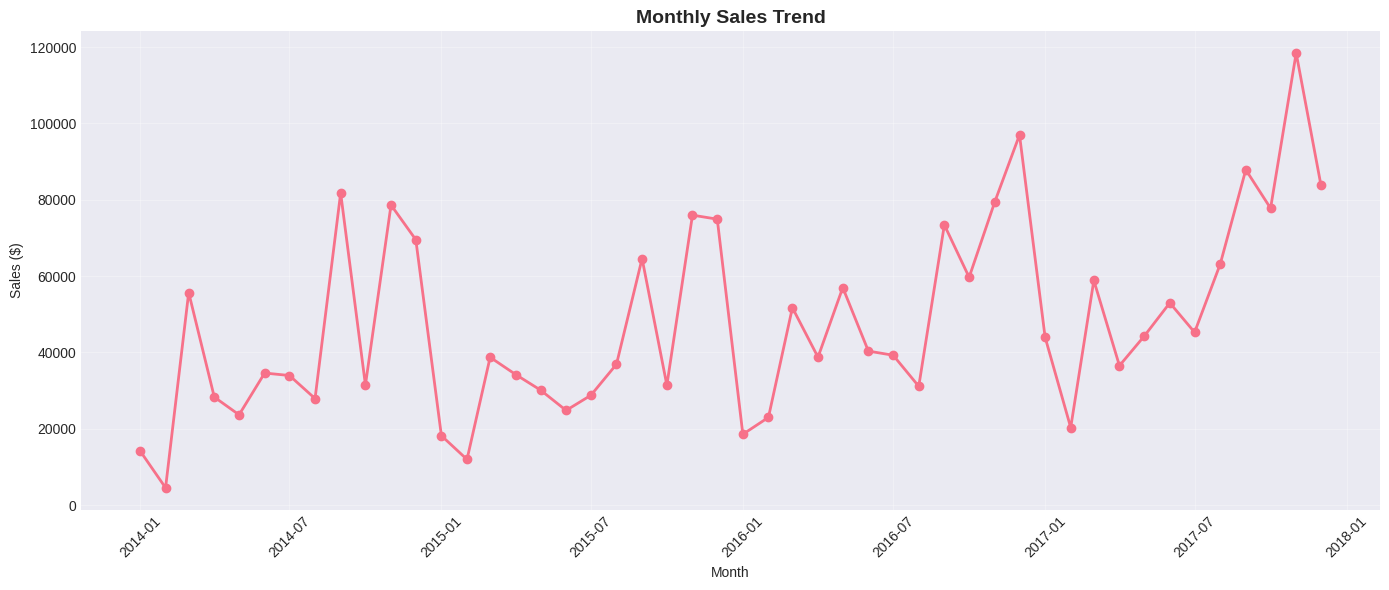


💡 Insight: Sales grew 488.8% from start to end of period


In [ ]:
# ============================================
# MONTHLY SALES TREND ANALYSIS
# ============================================

# Ensure 'Order Date' is datetime type, as df_clean might have been reset
# without reapplying date conversions from earlier cleaning steps.
if not pd.api.types.is_datetime64_any_dtype(df_clean['Order Date']):
    df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])

# Aggregate sales by month
monthly_data = df_clean.groupby(df_clean['Order Date'].dt.to_period('M')).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique'
}).reset_index()

monthly_data.columns = ['Month', 'Sales', 'Profit', 'Orders']
# Corrected line: Apply to_timestamp to each Period object in the Series
monthly_data['Month'] = monthly_data['Month'].apply(lambda x: x.to_timestamp())

# Display the data
print("📊 Monthly Sales Data:")
display(monthly_data.head(10))

# Create visualization
plt.figure(figsize=(14, 6))
plt.plot(monthly_data['Month'], monthly_data['Sales'], marker='o', linewidth=2, markersize=6)
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Key insight
growth = ((monthly_data['Sales'].iloc[-1] / monthly_data['Sales'].iloc[0]) - 1) * 100
print(f"\n💡 Insight: Sales grew {growth:.1f}% from start to end of period")

In [ ]:
# ============================================
# INVESTIGATE HIGH DISCOUNT LOSSES
# ============================================

# Filter transactions with >50% discount
high_discount = df_clean[df_clean['Discount'] > 0.5].copy()

print("🔍 ANALYZING HIGH DISCOUNT (>50%) TRANSACTIONS:")
print("="*70)

print(f"\nNumber of transactions: {len(high_discount):,}")
print(f"Total Sales: ${high_discount['Sales'].sum():,.2f}")
print(f"Total Profit: ${high_discount['Profit'].sum():,.2f}")
print(f"Overall Margin: {(high_discount['Profit'].sum() / high_discount['Sales'].sum() * 100):.1f}%")

# Check individual transactions
print("\n📋 Sample High Discount Transactions:")
sample = high_discount[['Product Name', 'Discount', 'Sales', 'Profit', 'Quantity']].head(10)
display(sample)

# Check profit distribution
print("\n💡 Profit Distribution for >50% Discounts:")
print(f"  • Profitable transactions: {(high_discount['Profit'] > 0).sum():,}")
print(f"  • Unprofitable transactions: {(high_discount['Profit'] < 0).sum():,}")
print(f"  • Average profit per transaction: ${high_discount['Profit'].mean():,.2f}")

# Worst performing products with high discounts
worst_products = high_discount.groupby('Product Name').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).sort_values('Profit').head(10)

print("\n⚠️ WORST PRODUCTS WITH HIGH DISCOUNTS:")
display(worst_products.style.format({
    'Sales': '${:,.2f}',
    'Profit': '${:,.2f}',
    'Discount': '{:.1%}'
}))

🔍 ANALYZING HIGH DISCOUNT (>50%) TRANSACTIONS:

Number of transactions: 856
Total Sales: $64,228.74
Total Profit: $-76,559.05
Overall Margin: -119.2%

📋 Sample High Discount Transactions:


,Product Name,Discount,Sales,Profit,Quantity
14,Holmes Replacement Filter for HEPA Air Cleaner...,0.8,68.810,-123.8580,5
15,Storex DuraTech Recycled Plastic Frosted Binders,0.8,2.544,-3.8160,3
28,Avery Recycled Flexi-View Covers for Binding S...,0.7,9.618,-7.0532,2
32,"Acco Pressboard Covers with Storage Hooks, 14 ...",0.7,6.858,-5.7150,6
36,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",0.6,190.920,-147.9630,5
75,Economy Binders,0.8,1.248,-1.9344,3
76,"6"" Cubicle Wall Clock, Black",0.6,9.708,-5.8248,3
78,"Eldon Expressions Desk Accessory, Wood Pencil ...",0.6,19.300,-14.4750,5
95,Flexible Leather- Look Classic Collection Ring...,0.7,5.682,-3.7880,1
101,Avery Hidden Tab Dividers for Binding Systems,0.8,1.788,-3.0396,3



💡 Profit Distribution for >50% Discounts:
  • Profitable transactions: 0
  • Unprofitable transactions: 856
  • Average profit per transaction: $-89.44

⚠️ WORST PRODUCTS WITH HIGH DISCOUNTS:


,Sales,Profit,Discount
Product Name,,,
Cubify CubeX 3D Printer Double Head Print,"$6,299.98","$-9,239.97",70.0%
GBC DocuBind P400 Electric Binding System,"$4,899.56","$-6,859.39",76.7%
GBC Ibimaster 500 Manual ProClick Binding System,"$6,696.62","$-5,098.57",71.7%
GBC DocuBind TL300 Electric Binding System,"$4,395.25","$-4,162.03",72.5%
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,"$2,287.78","$-3,431.67",80.0%
Lexmark MX611dhe Monochrome Laser Printer,"$2,549.99","$-3,399.98",70.0%
Ibico EPK-21 Electric Binding System,"$1,889.99","$-2,929.48",80.0%
Ibico Hi-Tech Manual Binding System,"$1,189.46","$-1,829.94",78.0%
GBC DocuBind 300 Electric Binding Machine,"$1,946.13","$-1,609.50",72.5%
